In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib

# Sigmoid

In [2]:
# Jansen-Rit
def sigm_Jansen(nu_max,v0,r,v):
  action_potential = 2*nu_max/(1+math.exp(r*(v0-v)))
  return action_potential

# Moran-David-Friston
def sigm_Moran(x,rho_2):
  return (1/(1+math.exp(-rho_1*(x - rho_2)))) - (1/(1+math.exp(rho_1*rho_2)))

# Liley-Wright
def S_e(t,v):   
    p = t
    spikerate = p.S_e_max/(1 + math.exp(-math.sqrt(2)*(v - p.mu_e)/p.sigma_e))
    return spikerate

# Robinson-Rennie-Wright
def sig(v,Qmax,theta,sigma):
 firing_rate = Qmax / (1 + math.exp(-(v-theta) / sigma))
 return firing_rate

In [3]:
# JR Parameters
v0 = [4,5,6,7,8]  
nu_max = 2.5   
r = 0.56       

# MDF Parameters
rho_1 = 2
rho_2 = [1,2,3,4,5]

# LW Parameters
class p:
  S_e_max = 500
  S_i_max = 500
  mu_e = -50
  mu_i = -50
  sigma_e = 5
  sigma_i = 5 

# RRW Parameters
Qmax = 340    
theta = [-10e-3, -5e-3, 0e-3, 5e-3, 10e-3]
sigma = 3.8e-3


In [4]:
t = np.arange(-5,20,0.001)
Jansen = np.zeros((len(v0),len(t)))
Moran =np.zeros((len(rho_2),len(t)))

for j in range(0,len(v0)):
  time= 0
  for i in t:
    Jansen[j,time]= sigm_Jansen(nu_max,v0[j],r,i)
    Moran[j,time] = sigm_Moran(i,rho_2[j])
    time = time+1

t_two = np.arange(-100,-20,0.01)
mu_e = [-40,-45,-50,-55,-60]
Liley =np.zeros((len(mu_e),len(t_two)))


for j in range(0,len(mu_e)):
  time = 0
  p.mu_e = mu_e[j]
  for i in t_two:
    Liley[j,time] = S_e(p,i)
    time = time+1

t_three = np.arange(-0.05,0.05,0.00001)
time = 0
Robinson =np.zeros((len(theta),len(t_three)))
for j in range(0,len(theta)):
  time = 0
  for i in t_three:
    Robinson[j,time] = sig(i,Qmax,theta[j],sigma)
    time = time+1

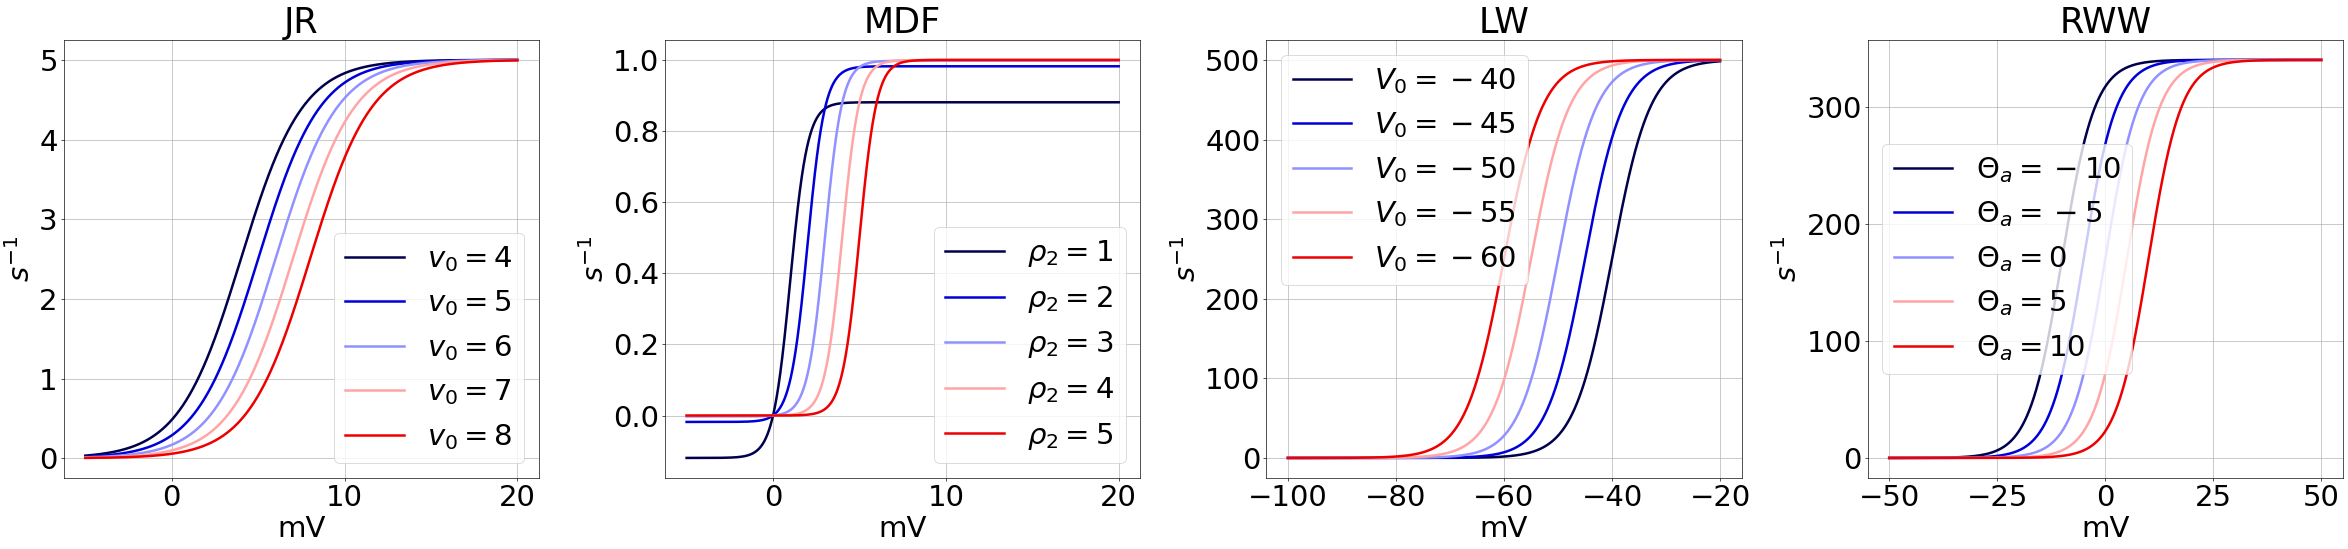

In [5]:
matplotlib.rcParams.update({'font.size': 35})

fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4 , figsize = (40,10), dpi=60)
h = 0
for i in range(0, len(v0)):
  ax1.plot(t,Jansen[i,:], color= plt.cm.seismic(h), label=r"$v_{0}=%d$" %v0[i], linewidth=3.0)
  h=h+50
h= 0
ax1.legend(loc='lower right')
for i in range(0, len(rho_2)):
  ax2.plot(t,Moran[i,:], color= plt.cm.seismic(h), label=r"$\rho_{2}=%d$" %rho_2[i], linewidth=3.0)
  h=h+50
h = 0
ax2.legend(loc='lower right')
for i in range(0, len(mu_e)):
  ax3.plot(t_two, Liley[i,:], color= plt.cm.seismic(h), label=r"$V_{0}=%d$" %mu_e[i], linewidth=3.0)
  h=h+50
h = 0
ax3.legend()
theta_mv = np.array(theta)*10**(3)
for i in range(0, len(theta)):
  ax4.plot(t_three*10**(3), Robinson[i,:], color= plt.cm.seismic(h),label=r"$\Theta_{a}=%d$" %theta_mv[i], linewidth=3.0)
  h=h+50
ax4.legend()

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax1.title.set_text('JR')
ax2.title.set_text('MDF')
ax3.title.set_text('LW')
ax4.title.set_text('RWW')

#fig.suptitle('Sigmoid function of each model') # or plt.suptitle('Main title')
for ax in fig.get_axes():
    ax.set(xlabel='mV', ylabel='$s^{-1}$')
plt.tight_layout()
plt.show()

# Impulse Response

In [6]:
def imp_Jansen(t,a,b):
  Exc = A*a*t*math.exp(-a*t)
  Inh = B*b*t*math.exp(-b*t)
  return Exc, Inh

def imp_Moran(t, kappa_e,kappa_i):
  Exc = He*kappa_e*t*math.exp(-kappa_e*t)
  Inh = Hi*kappa_i*t*math.exp(-kappa_i*t)
  return Exc,Inh

def imp_Liley(t,gamma_e,gamma_i):
  Exc = Gamma_e*gamma_e*t*math.exp(1-gamma_e*t)
  Inh = Gamma_i*gamma_i*t*math.exp(1-gamma_i*t)
  return Exc,Inh

def imp_Robinson(t,alpha):
  Dend_response = (alpha*beta/(beta-alpha))*(math.exp(-alpha*t)-math.exp(-beta*t)) #if beta different than alpha
  return Dend_response

In [7]:
# JR Parameters
A = 3.25
B = 22
a = [50,75,100,125,150]
b = [25,50,75,100,125]

# MDF Parameters
He = 4
Hi = 32
kappa_e = [50,75,100,125,150]
kappa_i = [25,50,75,100,125]

# LW Parameters
Gamma_e = 0.71
Gamma_i = 0.71
gamma_e = [100,200,300,400,500]
gamma_i = [45,55,65,75,85]

# RRW Parameters
alpha = [50, 60, 83.33, 90,100]
beta = 769.23

In [9]:
t = np.arange(0,0.2,0.001)
Jexc = np.zeros((len(a),len(t)))
Jinh = np.zeros((len(b),len(t)))
Mexc = np.zeros((len(b),len(t)))
Minh = np.zeros((len(b),len(t)))
Lexc = np.zeros((len(b),len(t)))
Linh = np.zeros((len(b),len(t)))
Rresponse = np.zeros((len(b),len(t)))

for j in range(0,len(a)):
  time = 0
  for i in t:
    Jexc[j,time], Jinh[j,time] = imp_Jansen(i,a[j],b[j])
    Mexc[j,time], Minh[j,time] = imp_Moran(i,kappa_e[j],kappa_i[j])
    Lexc[j,time], Linh[j,time] = imp_Liley(i,gamma_e[j],gamma_i[j])
    Rresponse[j,time] = imp_Robinson(i,alpha[j])
    time = time+1

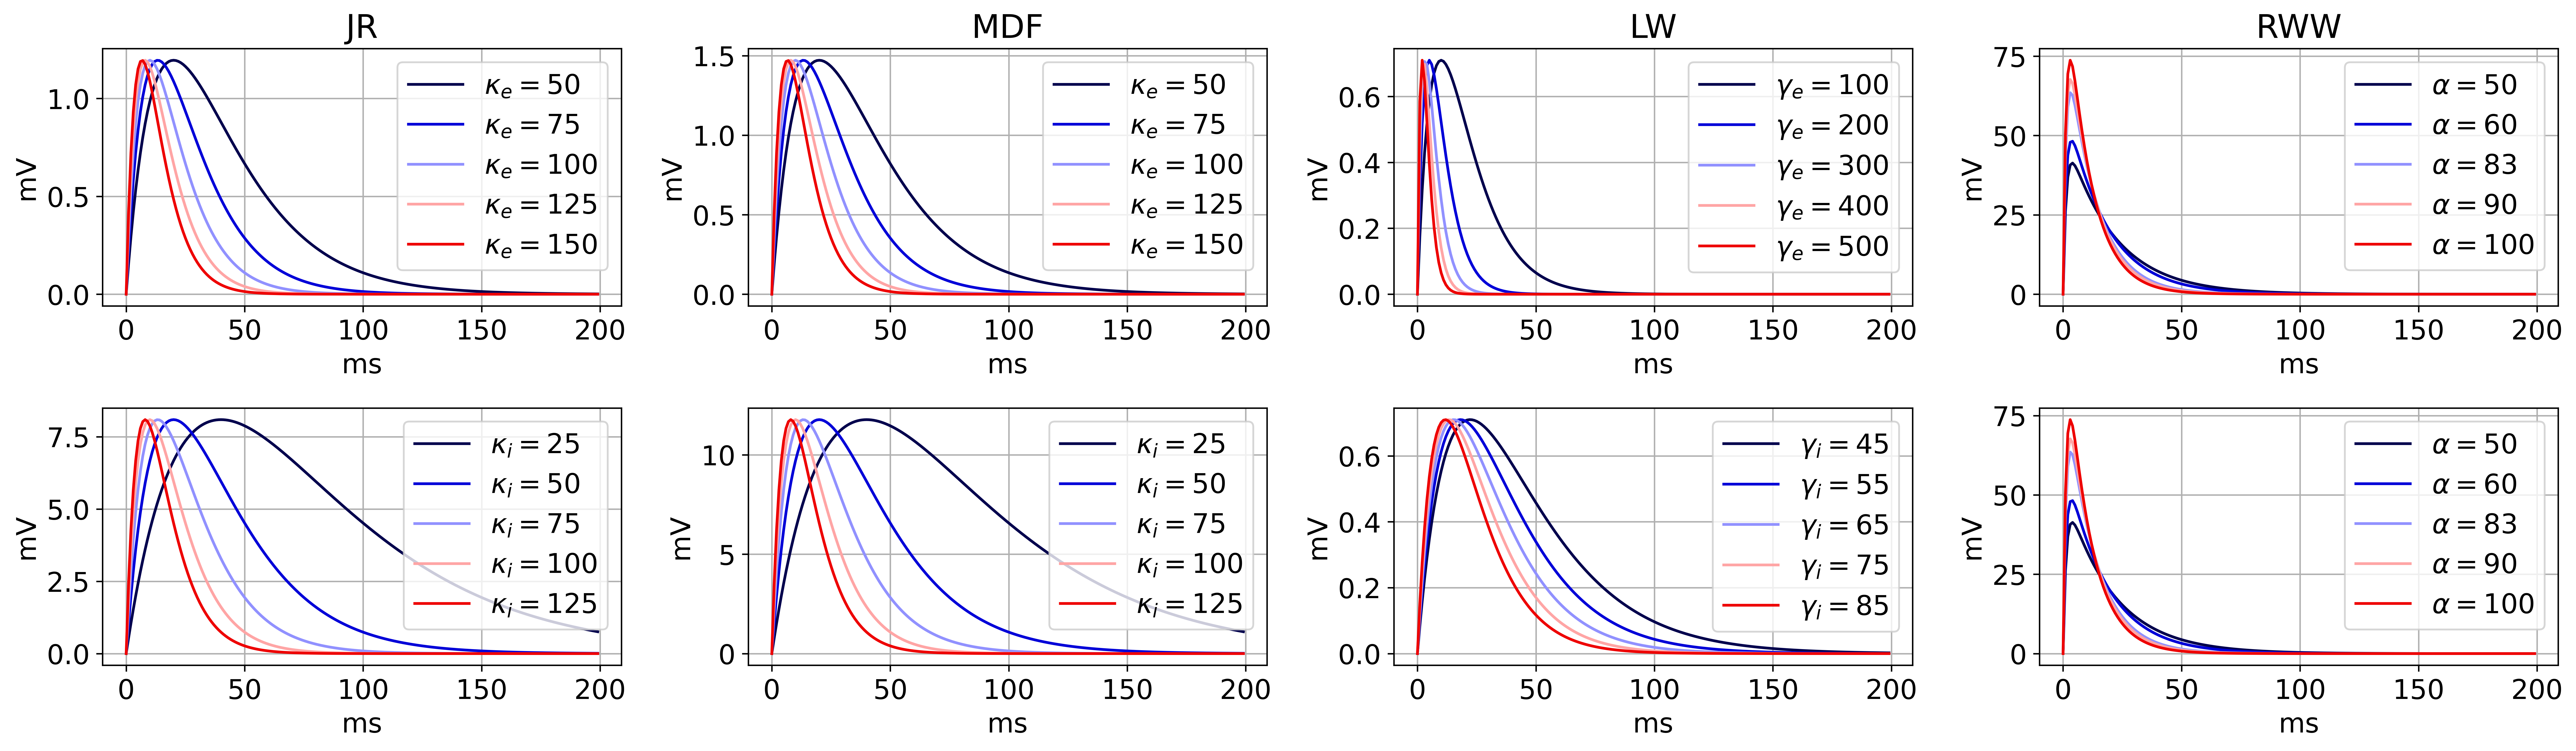

In [10]:
matplotlib.rcParams.update({'font.size': 15})

fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4 , figsize = (20,6),dpi=600)
h = 0
for i in range(0, len(a)):
  ax1.plot(t*10**3,Jexc[i,:], color= plt.cm.seismic(h),label=r"$\kappa_{e}=%d$" %a[i])
  ax5.plot(t*10**3,Jinh[i,:], color= plt.cm.seismic(h),label=r"$\kappa_{i}=%d$" %b[i])
  ax2.plot(t*10**3,Mexc[i,:], color= plt.cm.seismic(h),label=r"$\kappa_{e}=%d$" %kappa_e[i])
  ax6.plot(t*10**3,Minh[i,:], color= plt.cm.seismic(h),label=r"$\kappa_{i}=%d$" %kappa_i[i])
  ax3.plot(t*10**3,Lexc[i,:], color= plt.cm.seismic(h),label=r"$\gamma_{e}=%d$" %gamma_e[i])
  ax7.plot(t*10**3,Linh[i,:], color= plt.cm.seismic(h),label=r"$\gamma_{i}=%d$" %gamma_i[i])
  ax4.plot(t*10**3,Rresponse[i,:], color= plt.cm.seismic(h),label=r"$\alpha=%d$" %alpha[i])
  ax8.plot(t*10**3,Rresponse[i,:], color= plt.cm.seismic(h),label=r"$\alpha=%d$" %alpha[i])
  h = h + 50

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()
ax8.grid()
ax1.title.set_text('JR')
ax2.title.set_text('MDF')
ax3.title.set_text('LW')
ax4.title.set_text('RWW')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()

#fig.suptitle('Impulse or dentritic response of each model') # or plt.suptitle('Main title')

for ax in fig.get_axes():
    ax.set(xlabel='ms', ylabel='mV')
plt.tight_layout()
plt.show()